#Importing the important Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#Reading the Dataset into the notebook

In [3]:
df=pd.read_csv('C:/Users/ADMIN/Desktop/loan_data.csv')

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df=df.drop(['Loan_ID'],axis=1)

In [6]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [7]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
380,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


#Checking for missing values,replacing and filling the missing values.

In [8]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df['Gender']=df['Gender'].fillna(0)
df['Dependents']=df['Dependents'].fillna(0)
df['Self_Employed']=df['Self_Employed'].fillna(0)
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(0)
df['Credit_History']=df['Credit_History'].fillna(0)

In [10]:
df['Dependents']=df['Dependents'].replace(['3+'],'3')
df['Dependemts']=df['Dependents'].fillna(0)

In [11]:
df=df.drop(df[df['Gender']==0].index)
df=df.drop(df[df['Self_Employed']==0].index)

In [12]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Dependemts           0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 355 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             355 non-null    object 
 1   Married            355 non-null    object 
 2   Dependents         355 non-null    object 
 3   Education          355 non-null    object 
 4   Self_Employed      355 non-null    object 
 5   ApplicantIncome    355 non-null    int64  
 6   CoapplicantIncome  355 non-null    float64
 7   LoanAmount         355 non-null    float64
 8   Loan_Amount_Term   355 non-null    float64
 9   Credit_History     355 non-null    float64
 10  Property_Area      355 non-null    object 
 11  Loan_Status        355 non-null    object 
 12  Dependemts         355 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


#Visualizing the Dataset

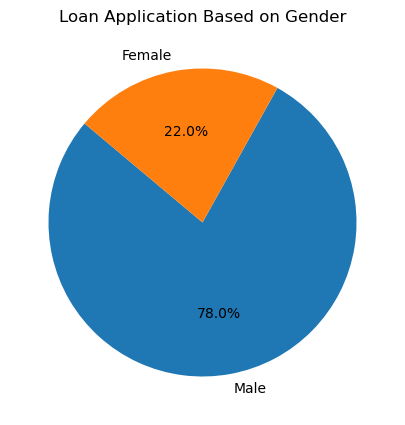

In [14]:
counts=df['Gender'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(counts,labels=counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Loan Application Based on Gender')
plt.show()

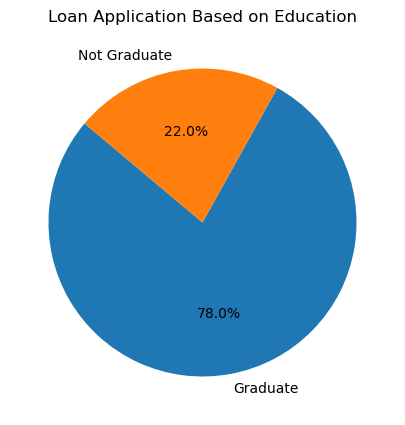

In [15]:
count=df['Education'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(counts,labels=count.index,autopct='%1.1f%%',startangle=140)
plt.title('Loan Application Based on Education')
plt.show()

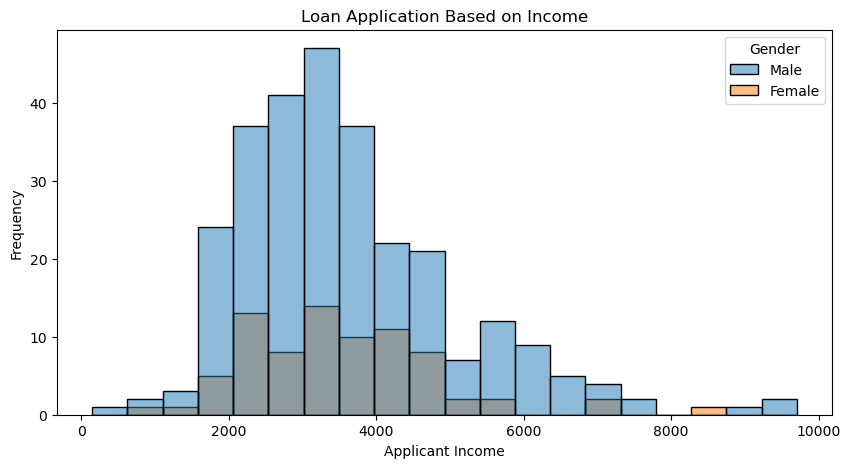

In [16]:
plt.figure(figsize=(10,5))
sns.histplot(df,x='ApplicantIncome',hue='Gender')
plt.title('Loan Application Based on Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

#Encoding columns for further analysis

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['Married']=encoder.fit_transform(df['Married'])
df['Education']=encoder.fit_transform(df['Education'])
df['Property_Area']=encoder.fit_transform(df['Property_Area'])
df['Loan_Status']=encoder.fit_transform(df['Loan_Status'])
df['Gender']=encoder.fit_transform(df['Gender'])
df['Self_Employed']=encoder.fit_transform(df['Self_Employed'])

#Splitting the Dataset into train and test data 

In [18]:
x=df.iloc[:,1:12]
y=df['Loan_Status']

In [19]:
x

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
376,1,3,0,0,5703,0.0,128.0,360.0,1.0,2,1
377,1,0,0,0,3232,1950.0,108.0,360.0,1.0,0,1
378,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
379,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1


In [20]:
df['Dependents']

0      1
1      0
2      0
3      0
4      0
      ..
376    3
377    0
378    0
379    3
380    0
Name: Dependents, Length: 355, dtype: object

In [21]:
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 355, dtype: int32

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

#Importing and building regression for model for prediction 

In [24]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [25]:
yhat=lr.predict(x_test)

#Checking for the accuracy of the regression model

In [26]:
from sklearn.metrics import accuracy_score
print('Accuracy :', accuracy_score(y_test,yhat))

Accuracy : 1.0


#Conclusion

The model attained an Accuracy of 100% which is a good thing.